In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from matplotlib import rcParams
from matplotlib import font_manager as fm

myfont = fm.FontProperties(fname= 'C:\Windows\Fonts\simhei.ttf')
# plt.rcParams['font.sans-serif'] = 'SimHei'
# plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline


In [218]:
datafile = 'air_data.csv'
data = pd.read_csv(datafile, encoding = 'utf-8')

In [219]:
explore = data.describe(percentiles = [], include = 'all').T
explore['null'] = len(data) - explore['count']
explore = explore[['null','max','min']]
explore.columns = ['空值数','最大值','最小值']

In [220]:
ffp = data['FFP_DATE'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))
ffp_year = ffp.map(lambda x: x.year)

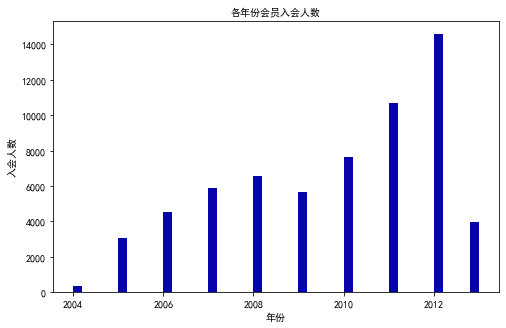

In [221]:
fig = plt.figure(figsize = (8 ,5))
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份', fontproperties= myfont)
plt.ylabel('入会人数', fontproperties= myfont)
plt.title('各年份会员入会人数', fontproperties= myfont)
plt.show()

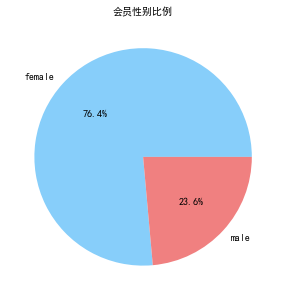

In [222]:
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
fig = plt.figure(figsize = (8 ,5))
plt.pie([ male, female], labels=['female','male'], colors=['lightskyblue', 'lightcoral'],autopct='%1.1f%%')
plt.title('会员性别比例', fontproperties= myfont)
plt.show()

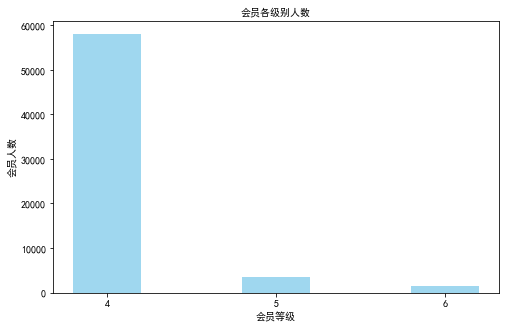

In [223]:
lv_four = pd.value_counts(data['FFP_TIER'])[4]
lv_five = pd.value_counts(data['FFP_TIER'])[5]
lv_six = pd.value_counts(data['FFP_TIER'])[6]

fig = plt.figure(figsize = (8 ,5))
plt.bar(x=range(3), height=[lv_four,lv_five,lv_six], width=0.4, alpha=0.8, color='skyblue')
plt.xticks([index for index in range(3)], ['4','5','6'])
plt.xlabel('会员等级', fontproperties= myfont)
plt.ylabel('会员人数', fontproperties= myfont)
plt.title('会员各级别人数', fontproperties= myfont)
plt.show()

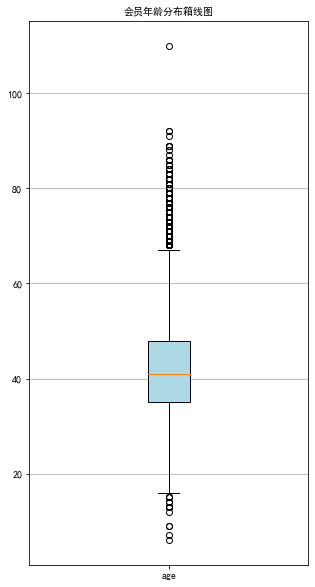

In [224]:
age = data['AGE'].dropna()
age = age.astype('int64')

fig = plt.figure(figsize = (5 ,10))
plt.boxplot(age, 
            patch_artist=True,
            labels = ['age'], 
            boxprops = {'facecolor':'lightblue'}) 
plt.title('会员年龄分布箱线图', fontproperties= myfont)
plt.grid(axis='y')
plt.show()

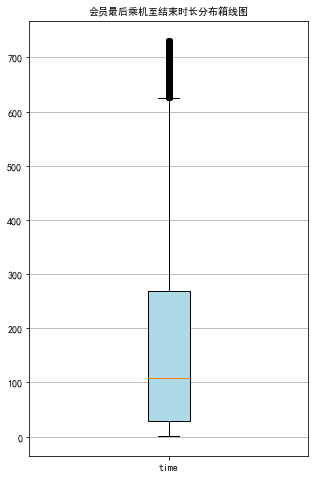

In [225]:
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
sks = data['SEG_KM_SUM']
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(lte, 
            patch_artist=True,
            labels = ['time'],  
            boxprops = {'facecolor':'lightblue'})  
plt.title('会员最后乘机至结束时长分布箱线图', fontproperties= myfont)
plt.grid(axis='y')
plt.show()

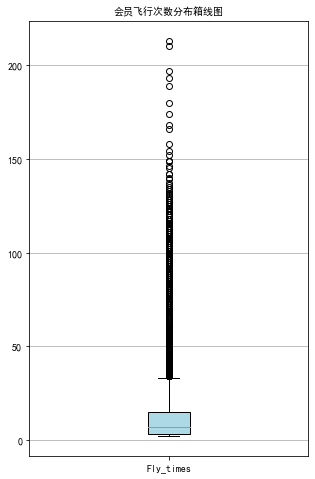

In [226]:
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(fc, 
            patch_artist=True,
            labels = ['Fly_times'],  
            boxprops = {'facecolor':'lightblue'})  
plt.title('会员飞行次数分布箱线图', fontproperties= myfont)

plt.grid(axis='y')
plt.show()

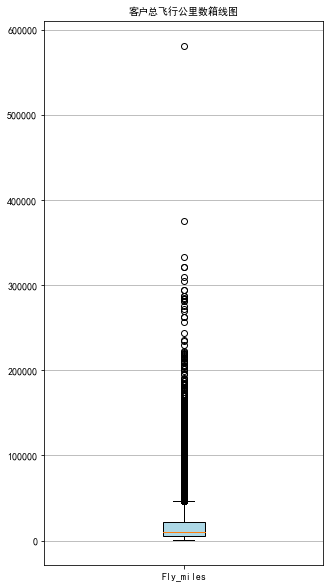

In [227]:
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(sks, 
            patch_artist=True,
            labels = ['Fly_miles'],  
            boxprops = {'facecolor':'lightblue'})  
plt.title('客户总飞行公里数箱线图', fontproperties= myfont)

plt.grid(axis='y')
plt.show()

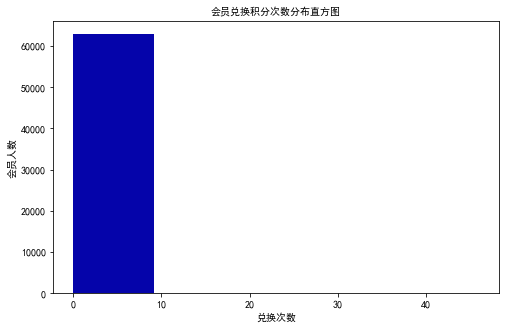

In [228]:
ec = data['EXCHANGE_COUNT']

fig = plt.figure(figsize = (8 ,5)) 
plt.hist(ec, bins=5, color='#0504aa')
plt.xlabel('兑换次数', fontproperties= myfont)
plt.ylabel('会员人数', fontproperties= myfont)
plt.title('会员兑换积分次数分布直方图', fontproperties= myfont)
plt.show()

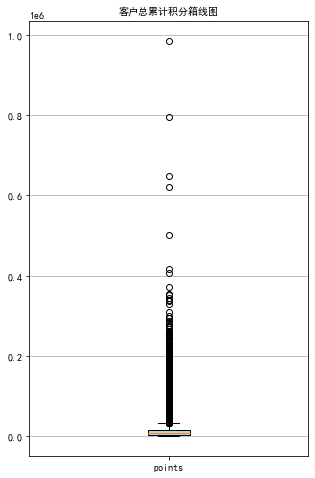

In [229]:
# 提取会员总累计积分
ps = data['Points_Sum']
# 绘制会员总累计积分箱线图
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(ps, 
            patch_artist=True,
            labels = ['points'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总累计积分箱线图', fontproperties= myfont)
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

In [231]:
data_corr = data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END',
                  'SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]



In [232]:
age1 = data['AGE'].fillna(0)
data_corr['AGE'] = age1.astype('int64')
data_corr['ffp_year'] = ffp_year
data_corr.to_csv('data_corr.csv')

C:\Users\Young Leon\AppData\Local\Temp\ipykernel_15892\3703003950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['AGE'] = age1.astype('int64')
C:\Users\Young Leon\AppData\Local\Temp\ipykernel_15892\3703003950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['ffp_year'] = ffp_year


In [233]:
dt_corr = data_corr.corr(method = 'pearson')
print('相关性矩阵为：\n',dt_corr)

相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610

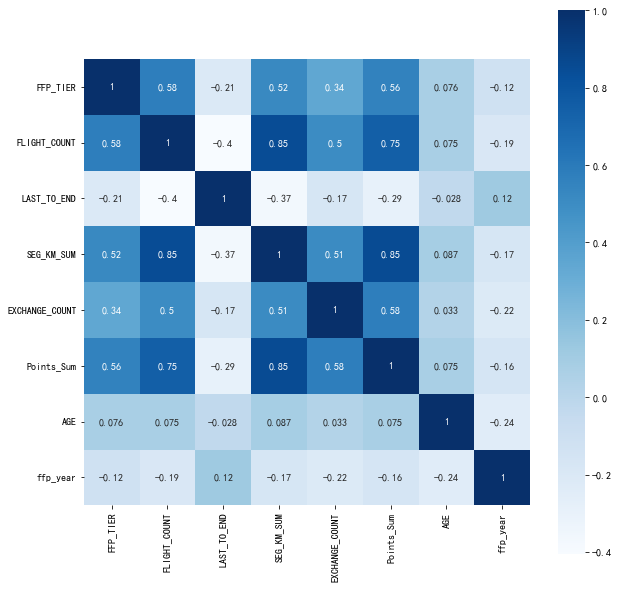

In [234]:
plt.subplots(figsize=(10, 10)) 
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues') 
plt.show()

# 开始进入分析环节

In [235]:
airline = data.loc[data['SUM_YR_1'].notnull() & 
                                   data['SUM_YR_2'].notnull(),:]
print('删除缺失记录后数据的形状为：',airline.shape)

删除缺失记录后数据的形状为： (62299, 44)


In [236]:
index1 = airline['SUM_YR_1'] != 0
index2 = airline['SUM_YR_2'] != 0
index3 = (airline['SEG_KM_SUM']> 0) & (airline['avg_discount'] != 0)
index4 = airline['AGE'] > 100 
airline = airline[(index1 | index2) & index3 & ~index4]
print('数据清洗后数据的形状为：',airline.shape)

数据清洗后数据的形状为： (62043, 44)


In [237]:
airline_selection = airline[['FFP_DATE','LOAD_TIME','LAST_TO_END',
                                     'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
print('筛选的属性前5行为：\n',airline_selection.head())

筛选的属性前5行为：
     FFP_DATE  LOAD_TIME  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0  2006/11/2  2014/3/31            1           210      580717      0.961639
1  2007/2/19  2014/3/31            7           140      293678      1.252314
2   2007/2/1  2014/3/31           11           135      283712      1.254676
3  2008/8/22  2014/3/31           97            23      281336      1.090870
4  2009/4/10  2014/3/31            5           152      309928      0.970658


In [238]:
# 构造属性L
L = pd.to_datetime(airline_selection['LOAD_TIME']) - pd.to_datetime(airline_selection['FFP_DATE'])
L = L.astype('str').str.split().str[0]
L = L.astype('int')/30

In [239]:
airline_features = pd.concat([L,airline_selection.iloc[:,2:]],axis = 1)
airline_features.columns = ['L','R','F','M','C']
print('构建的LRFMC属性前5行为：\n',airline_features.head())

构建的LRFMC属性前5行为：
            L   R    F       M         C
0  90.200000   1  210  580717  0.961639
1  86.566667   7  140  293678  1.252314
2  87.166667  11  135  283712  1.254676
3  68.233333  97   23  281336  1.090870
4  60.533333   5  152  309928  0.970658


In [240]:
data = StandardScaler().fit_transform(airline_features)
print('标准化后LRFMC五个属性为：\n',data[:5,:])

标准化后LRFMC五个属性为：
 [[ 1.43579256 -0.94493902 14.03402401 26.76115699  1.29554188]
 [ 1.30723219 -0.91188564  9.07321595 13.12686436  2.86817777]
 [ 1.32846234 -0.88985006  8.71887252 12.65348144  2.88095186]
 [ 0.65853304 -0.41608504  0.78157962 12.54062193  1.99471546]
 [ 0.3860794  -0.92290343  9.92364019 13.89873597  1.34433641]]


In [241]:
k = 5  # 确定聚类中心数

kmeans_model = KMeans(n_clusters = k,random_state=123)
fit_kmeans = kmeans_model.fit(data)

In [242]:
# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_  # 聚类中心
print('各类聚类中心为：\n',kmeans_cc)
kmeans_labels = kmeans_model.labels_  # 样本的类别标签
print('各样本的类别标签为：\n',kmeans_labels)
r1 = pd.Series(kmeans_model.labels_).value_counts()  # 统计不同类别样本的数目
print('最终每个类别的数目为：\n',r1)
# 输出聚类分群的结果
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,\
             columns = ['ZL','ZR','ZF','ZM','ZC'])   # 将聚类中心放在数据框中
cluster_center.index = pd.DataFrame(kmeans_model.labels_ ).\
                  drop_duplicates().iloc[:,0]  # 将样本类别作为数据框索引
print(cluster_center)

各类聚类中心为：
 [[-0.70030628 -0.41502288 -0.16081841 -0.16053724 -0.25728596]
 [ 0.0444681  -0.00249102 -0.23046649 -0.23492871  2.17528742]
 [ 0.48370858 -0.79939042  2.48317171  2.42445742  0.30923962]
 [ 1.1608298  -0.37751261 -0.08668008 -0.09460809 -0.15678402]
 [-0.31319365  1.68685465 -0.57392007 -0.5367502  -0.17484815]]
各样本的类别标签为：
 [2 2 2 ... 0 4 4]
最终每个类别的数目为：
 0    24630
3    15733
4    12117
2     5337
1     4226
dtype: int64
         ZL        ZR        ZF        ZM        ZC
0                                                  
2 -0.700306 -0.415023 -0.160818 -0.160537 -0.257286
1  0.044468 -0.002491 -0.230466 -0.234929  2.175287
3  0.483709 -0.799390  2.483172  2.424457  0.309240
0  1.160830 -0.377513 -0.086680 -0.094608 -0.156784
4 -0.313194  1.686855 -0.573920 -0.536750 -0.174848


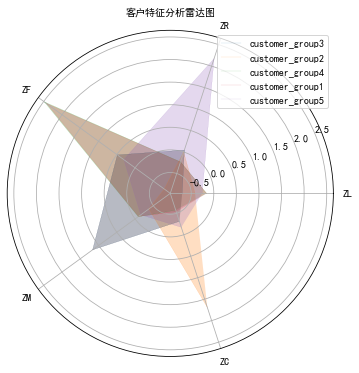

<function matplotlib.pyplot.close(fig=None)>

In [243]:
labels = ['ZL','ZR','ZF','ZM','ZC']
legen = ['customer_group' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])

n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
# angle = np.concatenate((angle, [angle[0]]))

# 绘图
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, polar=True)  # 以极坐标的形式绘制图形
#lables=np.concatenate((labels,[lables[0]]))
# 画线

ax.plot(angle, centers , linewidth=0.1)
# 添加属性标签
ax.fill(angle,centers,alpha = 0.25)

ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('客户特征分析雷达图', fontproperties= myfont)
plt.legend(legen)
plt.show()
plt.close

#  模型评估

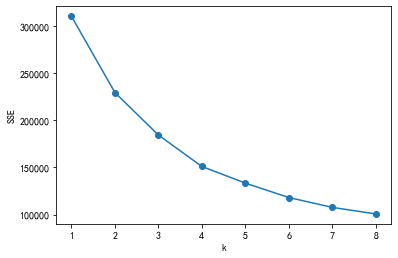

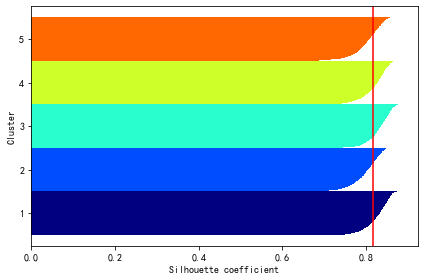

In [261]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import pandas as pd


# 读入数据'利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    km = KMeans(n_clusters = k,random_state=123)# 构造聚类器
    fit_kmeans = km.fit(data)
    SSE.append(km.inertia_) # inertia_获取聚类准则的总和
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()


k = 5  # 确定聚类中心数
X, y = make_blobs(n_samples=5000,  # 待生成的样本的总数
                  n_features=5,  # 每个样本的特征数
                  centers=5)  # 要生成的样本中心（类别）数，或者是确定的中心点
km = KMeans(n_clusters = k,random_state=123)
fit_kmeans = km.fit(data)
y_km = kmeans_model.fit_predict(X)

# 轮廓图
# 现实世界的问题通常没有条件把数据可视化在二维散点图上。
# 因为通常模型在更高维的数据集上工作。通常将创建轮廓图来评价结果
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="-")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

plt.show()
